0    9900
1     100
dtype: int64


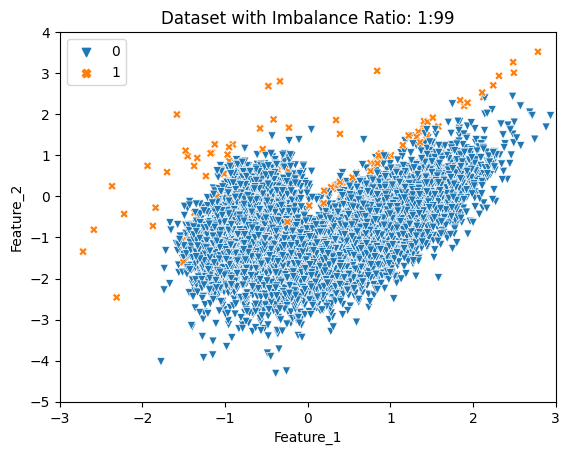

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data = X, 
        x = "Feature_1", y = "Feature_2", 
        hue = y, 
        style = y, 
        markers = markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()
    
    
    
X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 2,
    class_sep = 0.79,
    weights = [0.99],
    random_state = 81,
)

plot_dataset(X, y, "Dataset with Imbalance Ratio: 1:99")

###  OneSidedSelection :

`OneSidedSelection` is a machine learning technique designed for imbalanced datasets. It employs the k-nearest neighbors algorithm to identify and remove instances from the majority class that may be potentially misclassified or considered noisy. This process involves selecting instances from the majority class that are far from their nearest neighbors in the minority class. By iteratively eliminating such instances, `OneSidedSelection` aims to improve the quality of the training dataset, making it more balanced and robust. The technique helps enhance the performance of machine learning models, particularly in scenarios where there is a significant imbalance between class distributions.

Resampled dataset shape Counter({0: 4276, 1: 100})
0    4276
1     100
dtype: int64


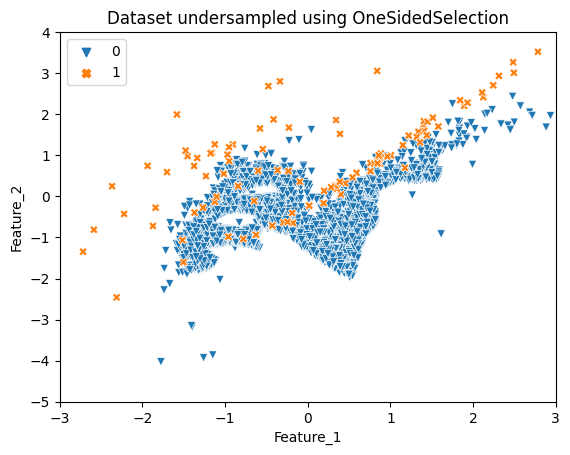

In [2]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(random_state=0, n_seeds_S=10)
X_res, y_res = oss.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using OneSidedSelection")